# 🧪 Práctica de Laboratorio: Árboles de Decisión, Random Forest, SVM y Redes Neuronales

**Asignatura:** Aprendizaje Automático  
**Carrera:** Computación  
**Docente:** Ing. Remigio Hurtado  

---

## 🎯 Título

**Explicación de Predicciones utilizando Random Forest y Redes Neuronales**  
*Alternativa a: Dataset no basado en imágenes (Online Shoppers Purchasing Intention)*

---

## 👥 Integrantes

- Diego Carrión Portilla  
- Andrés Chabla  

---

## Docente
- Ing.Remigio Hurtado O.

---

## 📌 Objetivo

Aplicar técnicas de aprendizaje automático (Random Forest y Redes Neuronales) para problemas de clasificación utilizando un dataset real. Justificar las predicciones y evaluar el rendimiento de los modelos mediante visualización y métricas.

In [2]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.19.0
Built with CUDA: False
GPU Available: []


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
print("Librerias cargadas correctamente")

Librerias cargadas correctamente


## Carga y exploración del dataset

#### Qué hace:
Carga el dataset de intenciones de compra en línea y muestra los primeros registros y distribución de la variable objetivo (Revenue).

#### Técnicas:
Lectura de CSV con pandas, análisis exploratorio simple.

In [4]:
# Cargar dataset
df = pd.read_csv("online_shoppers_intention.csv")

# Ver primeros registros
print(df.head())
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})



   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

## Análisis Exploratorio de Datos (EDA)

En esta sección se realiza un análisis descriptivo del conjunto de datos con el objetivo de comprender la distribución de las variables y las relaciones entre ellas. Se presentan las siguientes exploraciones:

1. **Distribución de la Variable Objetivo:** Se analiza la proporción de clientes que realizaron una compra frente a los que no lo hicieron.
2. **Correlación entre Variables Numéricas:** Se examinan las correlaciones entre las variables numéricas para identificar posibles relaciones lineales relevantes.
3. **Distribución de Variables Numéricas:** Se visualiza la distribución de cada variable numérica para comprender su comportamiento individual.
4. **Relación entre Variables Categóricas y la Variable Objetivo:** Se explora la relación entre las categorías de variables como el mes, el tipo de visitante y si la visita fue durante el fin de semana, con respecto a la decisión de compra.


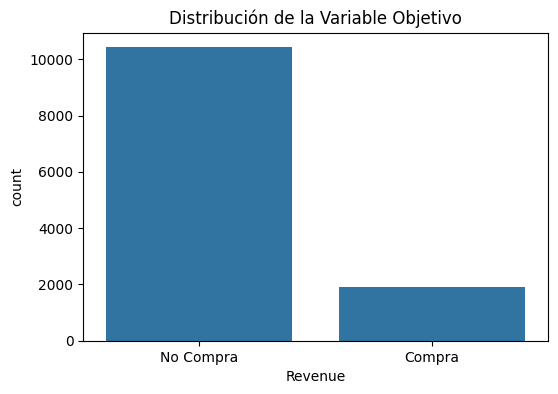

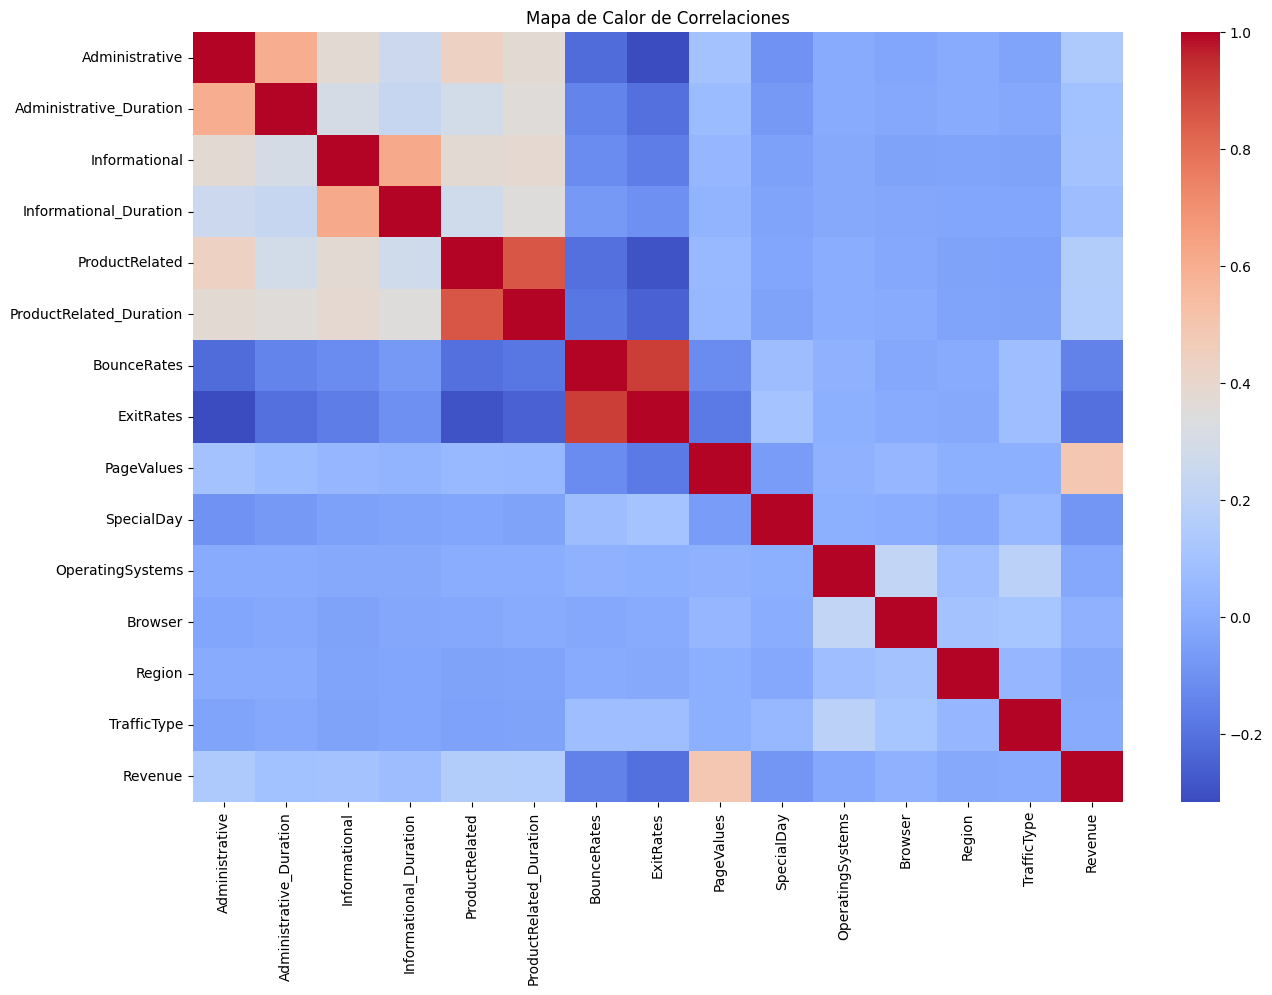

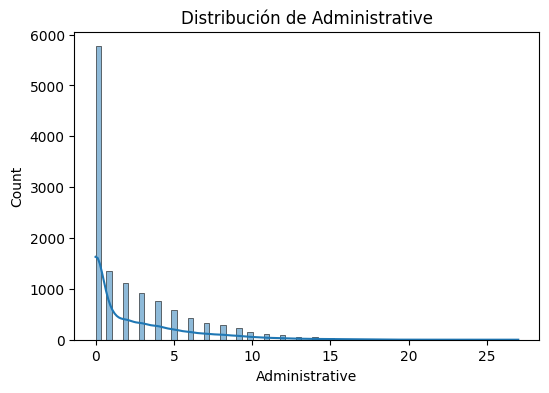

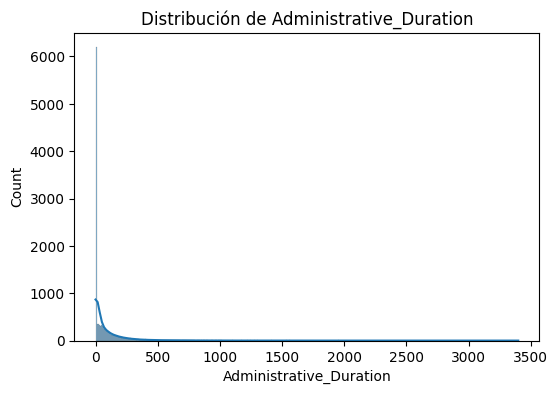

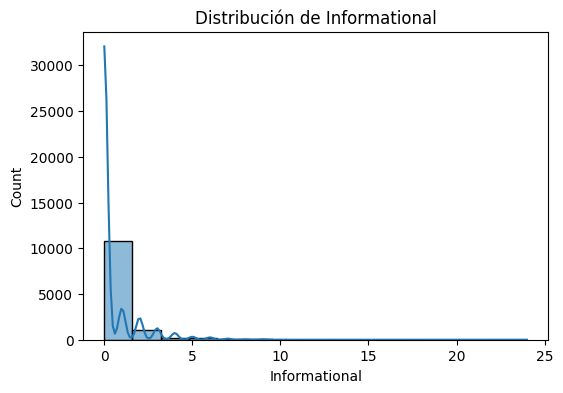

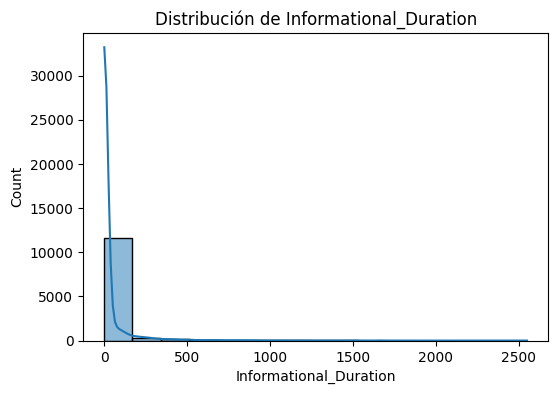

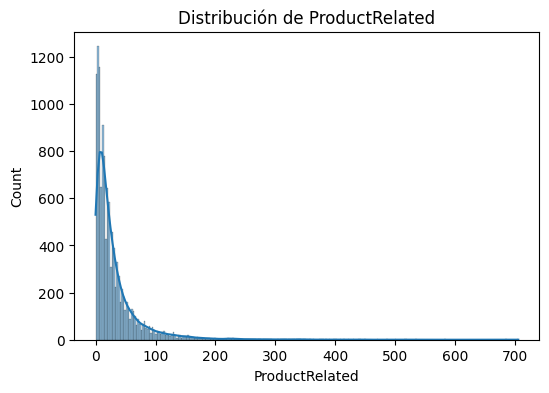

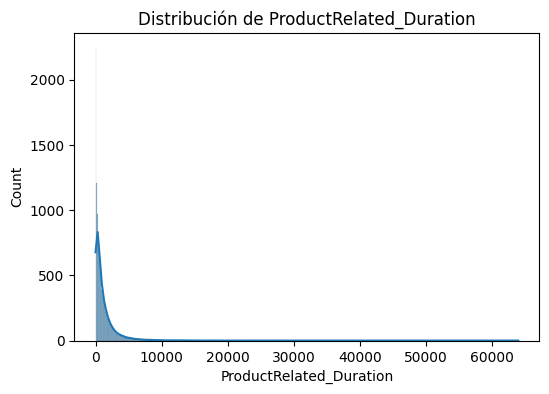

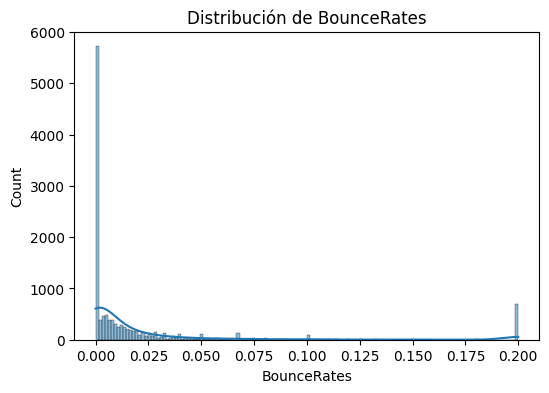

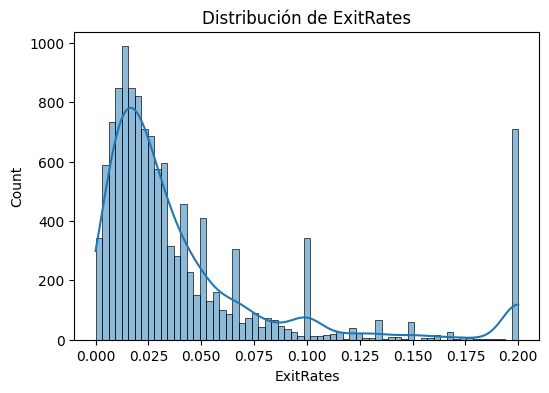

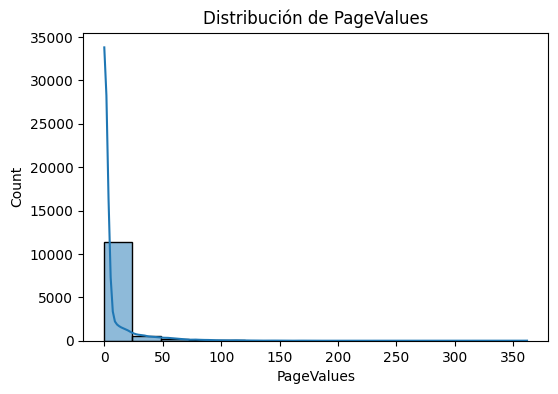

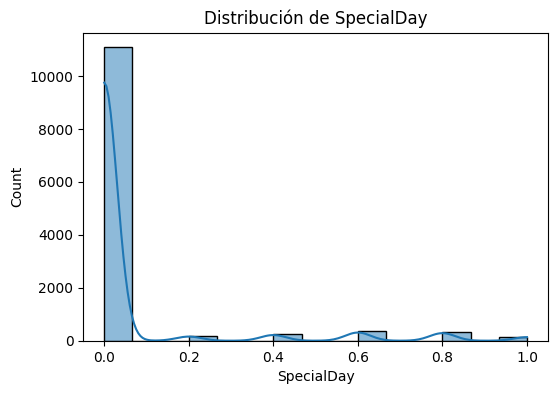

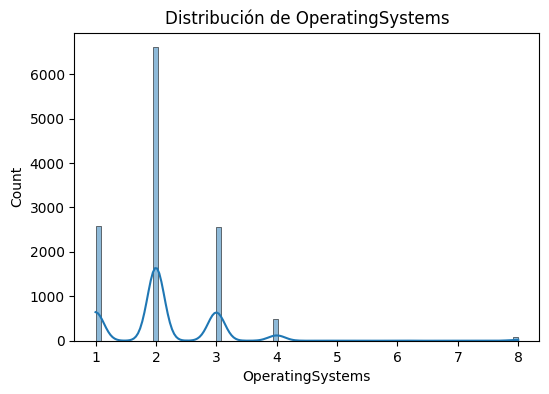

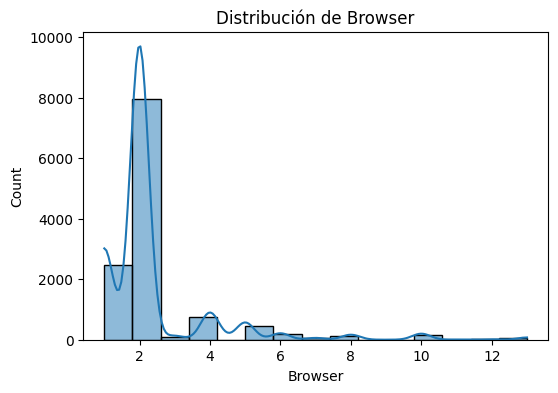

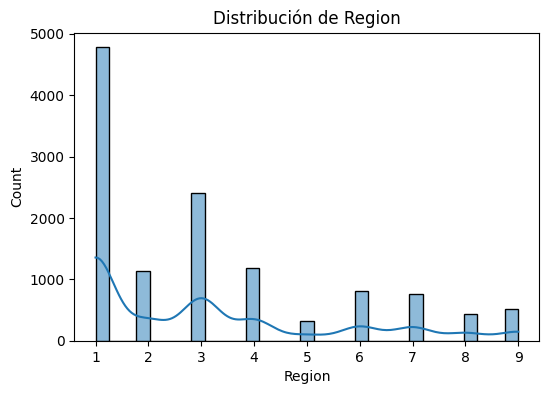

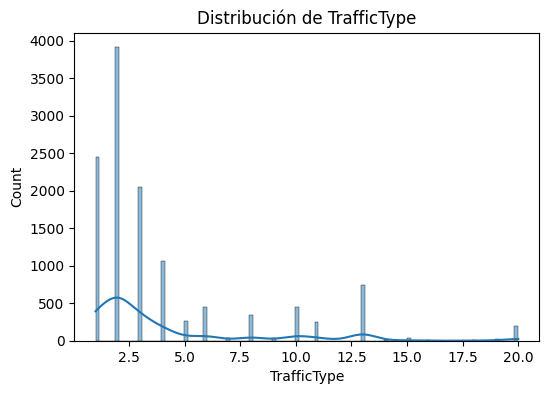

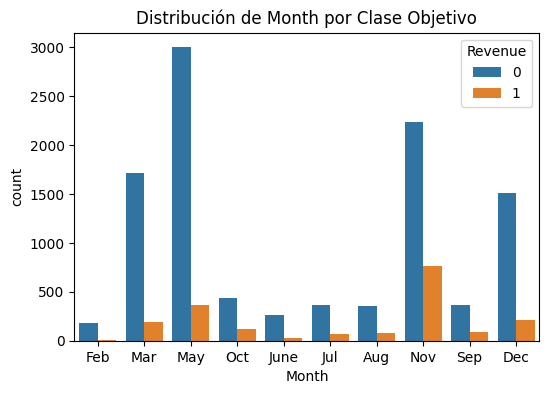

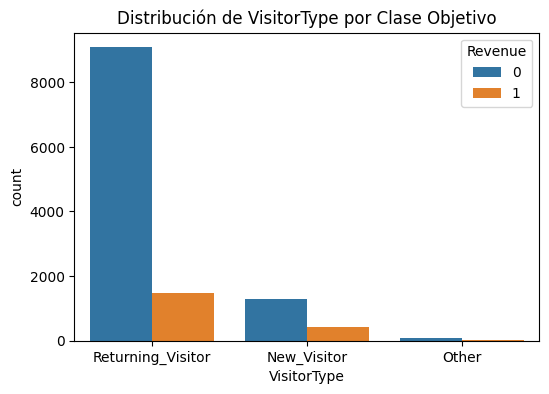

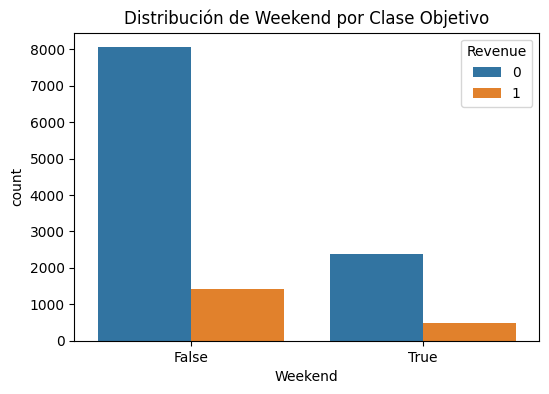

In [5]:
# Análisis Exploratorio

# 1. Distribución de la Variable Objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.xticks([0, 1], ['No Compra', 'Compra'])
plt.show()

# 2. Correlación entre Variables Numéricas
numericas_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))
sns.heatmap(numericas_df.corr(), cmap='coolwarm', annot=False)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# 3. Distribución de Variables Numéricas
numericas = numericas_df.columns

for col in numericas:
    if col != 'Revenue':
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.show()

# 4. Relación entre Variables Categóricas y la Variable Objetivo
categoricas = ['Month', 'VisitorType', 'Weekend']

for cat in categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=cat, hue='Revenue', data=df)
    plt.title(f'Distribución de {cat} por Clase Objetivo')
    plt.show()


## Preprocesamiento de Datos

En esta etapa se realiza la codificación de las variables categóricas mediante técnicas de one-hot encoding para convertirlas en variables numéricas adecuadas para los modelos de machine learning. 

Posteriormente, se separan las variables independientes (`X`) y la variable objetivo (`y`). Finalmente, se divide el conjunto de datos en subconjuntos de entrenamiento y prueba, y se aplica un escalado estándar a las variables para normalizar su rango y mejorar el desempeño de los modelos.

#### Técnicas:

- Codificación One-Hot (get_dummies)

- Escalado Z (StandardScaler)

- Separación de conjuntos (train_test_split)

In [6]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar variables y variable objetivo
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Desarrollo y Optimización de Modelos

Se desarrollaron tres modelos de clasificación para predecir la intención de compra:

1. **Random Forest con Búsqueda en Grid (GridSearchCV):**  
   Se utilizó un clasificador basado en árboles de decisión agregados para mejorar la precisión. La búsqueda en cuadrícula permitió optimizar hiperparámetros clave como el número de árboles (`n_estimators`), la profundidad máxima de cada árbol (`max_depth`) y el mínimo número de muestras para dividir un nodo (`min_samples_split`).

2. **Support Vector Machine (SVM) con GridSearchCV:**  
   Se entrenó un modelo SVM que busca el hiperplano óptimo para separar las clases. Se optimizaron los parámetros de regularización (`C`) y el tipo de kernel (`linear` o `rbf`) para mejorar la capacidad de generalización.

3. **Red Neuronal Artificial (ANN):**  
   Se diseñó una red neuronal feedforward con dos capas ocultas usando la función de activación ReLU y una capa de salida con activación sigmoide para clasificación binaria. Se utilizó el optimizador Adam y la función de pérdida binaria cruzada. El modelo se entrenó durante 10 épocas con un 10% de los datos para validación.


In [7]:
# Random Forest con GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Accuracy en test:", grid_rf.score(X_test, y_test))

# SVM con GridSearchCV
svm = SVC(probability=True, random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Mejores parámetros SVM:", grid_svm.best_params_)
print("Accuracy en test:", grid_svm.score(X_test, y_test))

# Modelo Red Neuronal
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluar
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy NN: {acc:.4f}")


Mejores parámetros Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy en test: 0.897404703974047
Mejores parámetros SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy en test: 0.8844282238442822


c:\Users\dcpor\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8316 - loss: 0.4114 - val_accuracy: 0.8845 - val_loss: 0.2756
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8990 - loss: 0.2503 - val_accuracy: 0.8906 - val_loss: 0.2594
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.2477 - val_accuracy: 0.8946 - val_loss: 0.2547
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.2288 - val_accuracy: 0.8946 - val_loss: 0.2530
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.2193 - val_accuracy: 0.8967 - val_loss: 0.2566
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 0.2296 - val_accuracy: 0.8977 - val_loss: 0.2488
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9101 - loss: 0.2201 - val_accuracy: 0.8977 - val_loss: 0.2507
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9056 - loss: 0.2227 - val_accuracy: 0.

## Comparación de Modelos y Visualización

Se compararon los tres modelos desarrollados utilizando la métrica de accuracy sobre el conjunto de prueba. Se visualizan las precisiones mediante un gráfico de barras para facilitar la comparación.

Para la red neuronal, además, se muestra la evolución del accuracy durante el entrenamiento y la validación a lo largo de las épocas.

Finalmente, se presentan las matrices de confusión para el modelo Random Forest y la red neuronal, con el fin de analizar en detalle las clasificaciones correctas e incorrectas de cada modelo.

**Justificación y análisis:**

Los resultados muestran que el modelo Random Forest obtuvo la mayor precisión en el conjunto de prueba, seguido de cerca por la red neuronal y el SVM. La curva de accuracy durante el entrenamiento de la red neuronal indica un buen ajuste, con ligera mejora en la validación.

Las matrices de confusión permiten identificar que los modelos tienden a clasificar correctamente la mayoría de los casos, aunque es posible observar algunos falsos positivos y negativos, lo cual es importante considerar para futuras mejoras o para el contexto del problema real.

Este análisis visual y numérico respalda la elección de los modelos y aporta confianza en la calidad de las predicciones realizadas.


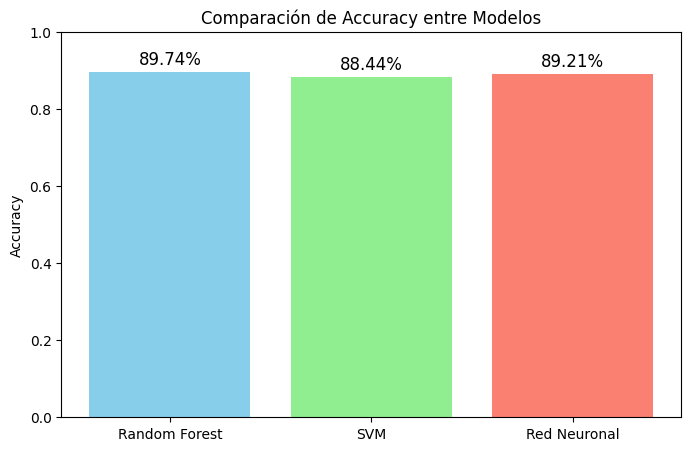

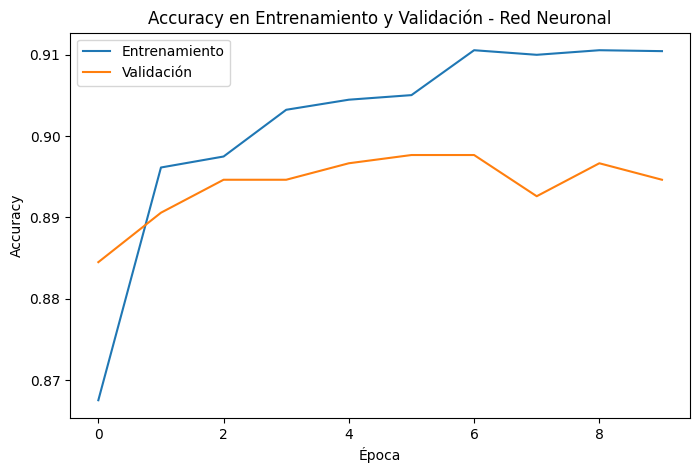

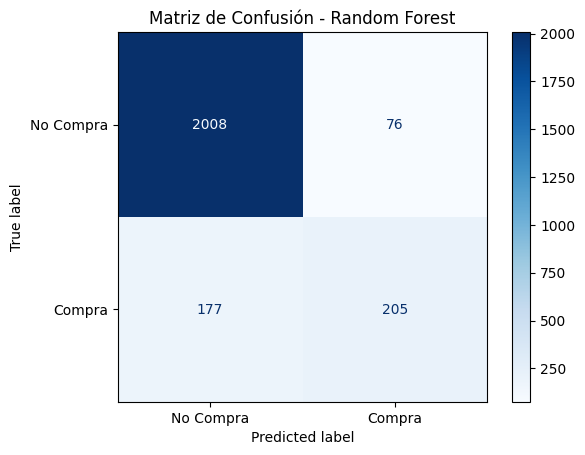

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


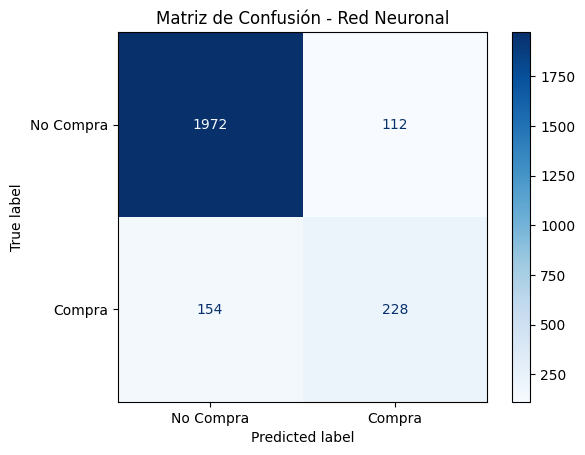

In [8]:
# Guardar accuracy de cada modelo
results = {
    'Random Forest': grid_rf.score(X_test, y_test),
    'SVM': grid_svm.score(X_test, y_test),
    'Red Neuronal': acc
}

# Gráfico de comparación de accuracy
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2%}', ha='center', fontsize=12)

plt.show()

# Gráfica de accuracy durante el entrenamiento
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy en Entrenamiento y Validación - Red Neuronal')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión - Random Forest
y_pred_rf = grid_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Compra', 'Compra'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Matriz de confusión - Red Neuronal
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Compra', 'Compra'])
disp_nn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()


## Justificación de las Predicciones mediante Interpretabilidad de Modelos

Para comprender y justificar las predicciones de los modelos, se utilizan técnicas de interpretación basadas en la librería SHAP (SHapley Additive exPlanations). 

SHAP permite identificar la contribución de cada característica a la predicción individual, facilitando una explicación transparente de los resultados obtenidos por los modelos. 

A continuación, se muestra la explicación para un nuevo sample utilizando el modelo Random Forest como ejemplo.


## Predicción de Nuevos Samples con Casos Representativos

Se define una función genérica para realizar predicciones con los modelos optimizados sobre nuevos samples. 

Para validar su correcto funcionamiento, se aplicó la función a dos ejemplos distintos que representan casos de clientes con diferentes características y clases objetivo (compra y no compra).

Esto permite verificar la capacidad de los modelos para generalizar y predecir adecuadamente en escenarios variados.


In [9]:
# Guardar las columnas utilizadas en el entrenamiento
columnas_entrenamiento = X.columns
# Nuevos samples representativos para las dos clases
sample_no_compra = {
    'Administrative': 0,
    'Administrative_Duration': 0,
    'Informational': 0,
    'Informational_Duration': 0,
    'ProductRelated': 1,
    'ProductRelated_Duration': 20,
    'BounceRates': 0.03,
    'ExitRates': 0.04,
    'PageValues': 0.0,
    'SpecialDay': 0,
    'Month': 'Jan',
    'OperatingSystems': 2,
    'Browser': 1,
    'Region': 1,
    'TrafficType': 1,
    'VisitorType': 'New_Visitor',
    'Weekend': False
}

sample_compra = {
    'Administrative': 3,
    'Administrative_Duration': 100,
    'Informational': 2,
    'Informational_Duration': 50,
    'ProductRelated': 20,
    'ProductRelated_Duration': 500,
    'BounceRates': 0.01,
    'ExitRates': 0.02,
    'PageValues': 15.0,
    'SpecialDay': 0,
    'Month': 'Nov',
    'OperatingSystems': 1,
    'Browser': 3,
    'Region': 2,
    'TrafficType': 2,
    'VisitorType': 'Returning_Visitor',
    'Weekend': True
}

# Función genérica para predicción (ejemplo con Random Forest)
def predecir_sample(sample_dict, modelo, scaler):
    sample_df = pd.DataFrame([sample_dict])
    sample_df = pd.get_dummies(sample_df)
    sample_df = sample_df.reindex(columns=columnas_entrenamiento, fill_value=0)
    sample_scaled = scaler.transform(sample_df)
    pred = modelo.predict(sample_scaled)[0]
    proba = modelo.predict_proba(sample_scaled)[0][1]
    return {'prediccion': pred, 'probabilidad': proba}

# Pruebas con los dos samples
print("Predicción para sample No Compra:", predecir_sample(sample_no_compra, grid_rf.best_estimator_, scaler))
print("Predicción para sample Compra:", predecir_sample(sample_compra, grid_rf.best_estimator_, scaler))


Predicción para sample No Compra: {'prediccion': np.int64(0), 'probabilidad': np.float64(0.07)}
Predicción para sample Compra: {'prediccion': np.int64(1), 'probabilidad': np.float64(0.54)}


## ✍️ Ejercicio 3: Nuevos escenarios de splitting

### Descripción:
Se evalúan dos escenarios de división de un nodo raíz que contiene 100 ejemplos: 50 positivos y 50 negativos. El objetivo es calcular el **Information Gain** (IG) de cada escenario utilizando tres métricas distintas de impureza:

- **Classification Error**
- **Gini Impurity**
- **Entropía**

A partir de los resultados, se debe:
1. Comparar qué escenario es mejor según cada métrica.
2. Relacionar los resultados con la **intuición de pureza** de cada división.

---

### Escenario A:
- Nodo raíz: (50, 50)
- División:
  - Izquierdo: (40, 10)
  - Derecho: (10, 40)

### Escenario B:
- Nodo raíz: (50, 50)
- División:
  - Izquierdo: (25, 0)
  - Derecho: (25, 50)

---

### Resultados de Information Gain (IG):

| Métrica              | Escenario A | Escenario B |
|----------------------|-------------|-------------|
| Classification Error | 0.3000      | 0.2500      |
| Gini Impurity        | 0.1800      | 0.1667      |
| Entropía             | 0.2781      | 0.3113      |

---

### Conclusión:
- Según **Classification Error** y **Gini**, el mejor escenario es **A**.
- Según **Entropía**, el mejor escenario es **B**.
- Intuitivamente, **B tiene un nodo izquierdo perfectamente puro**, pero el derecho es muy mezclado.
- En **A**, ambos nodos están moderadamente puros, lo que puede dar mejor balance general.

➡️ Por lo tanto, **Escenario A** es preferido si buscamos equilibrio en las divisiones; **Escenario B** si priorizamos nodos con pureza total.


![Image (2).jpg](<attachment:Image (2).jpg>)
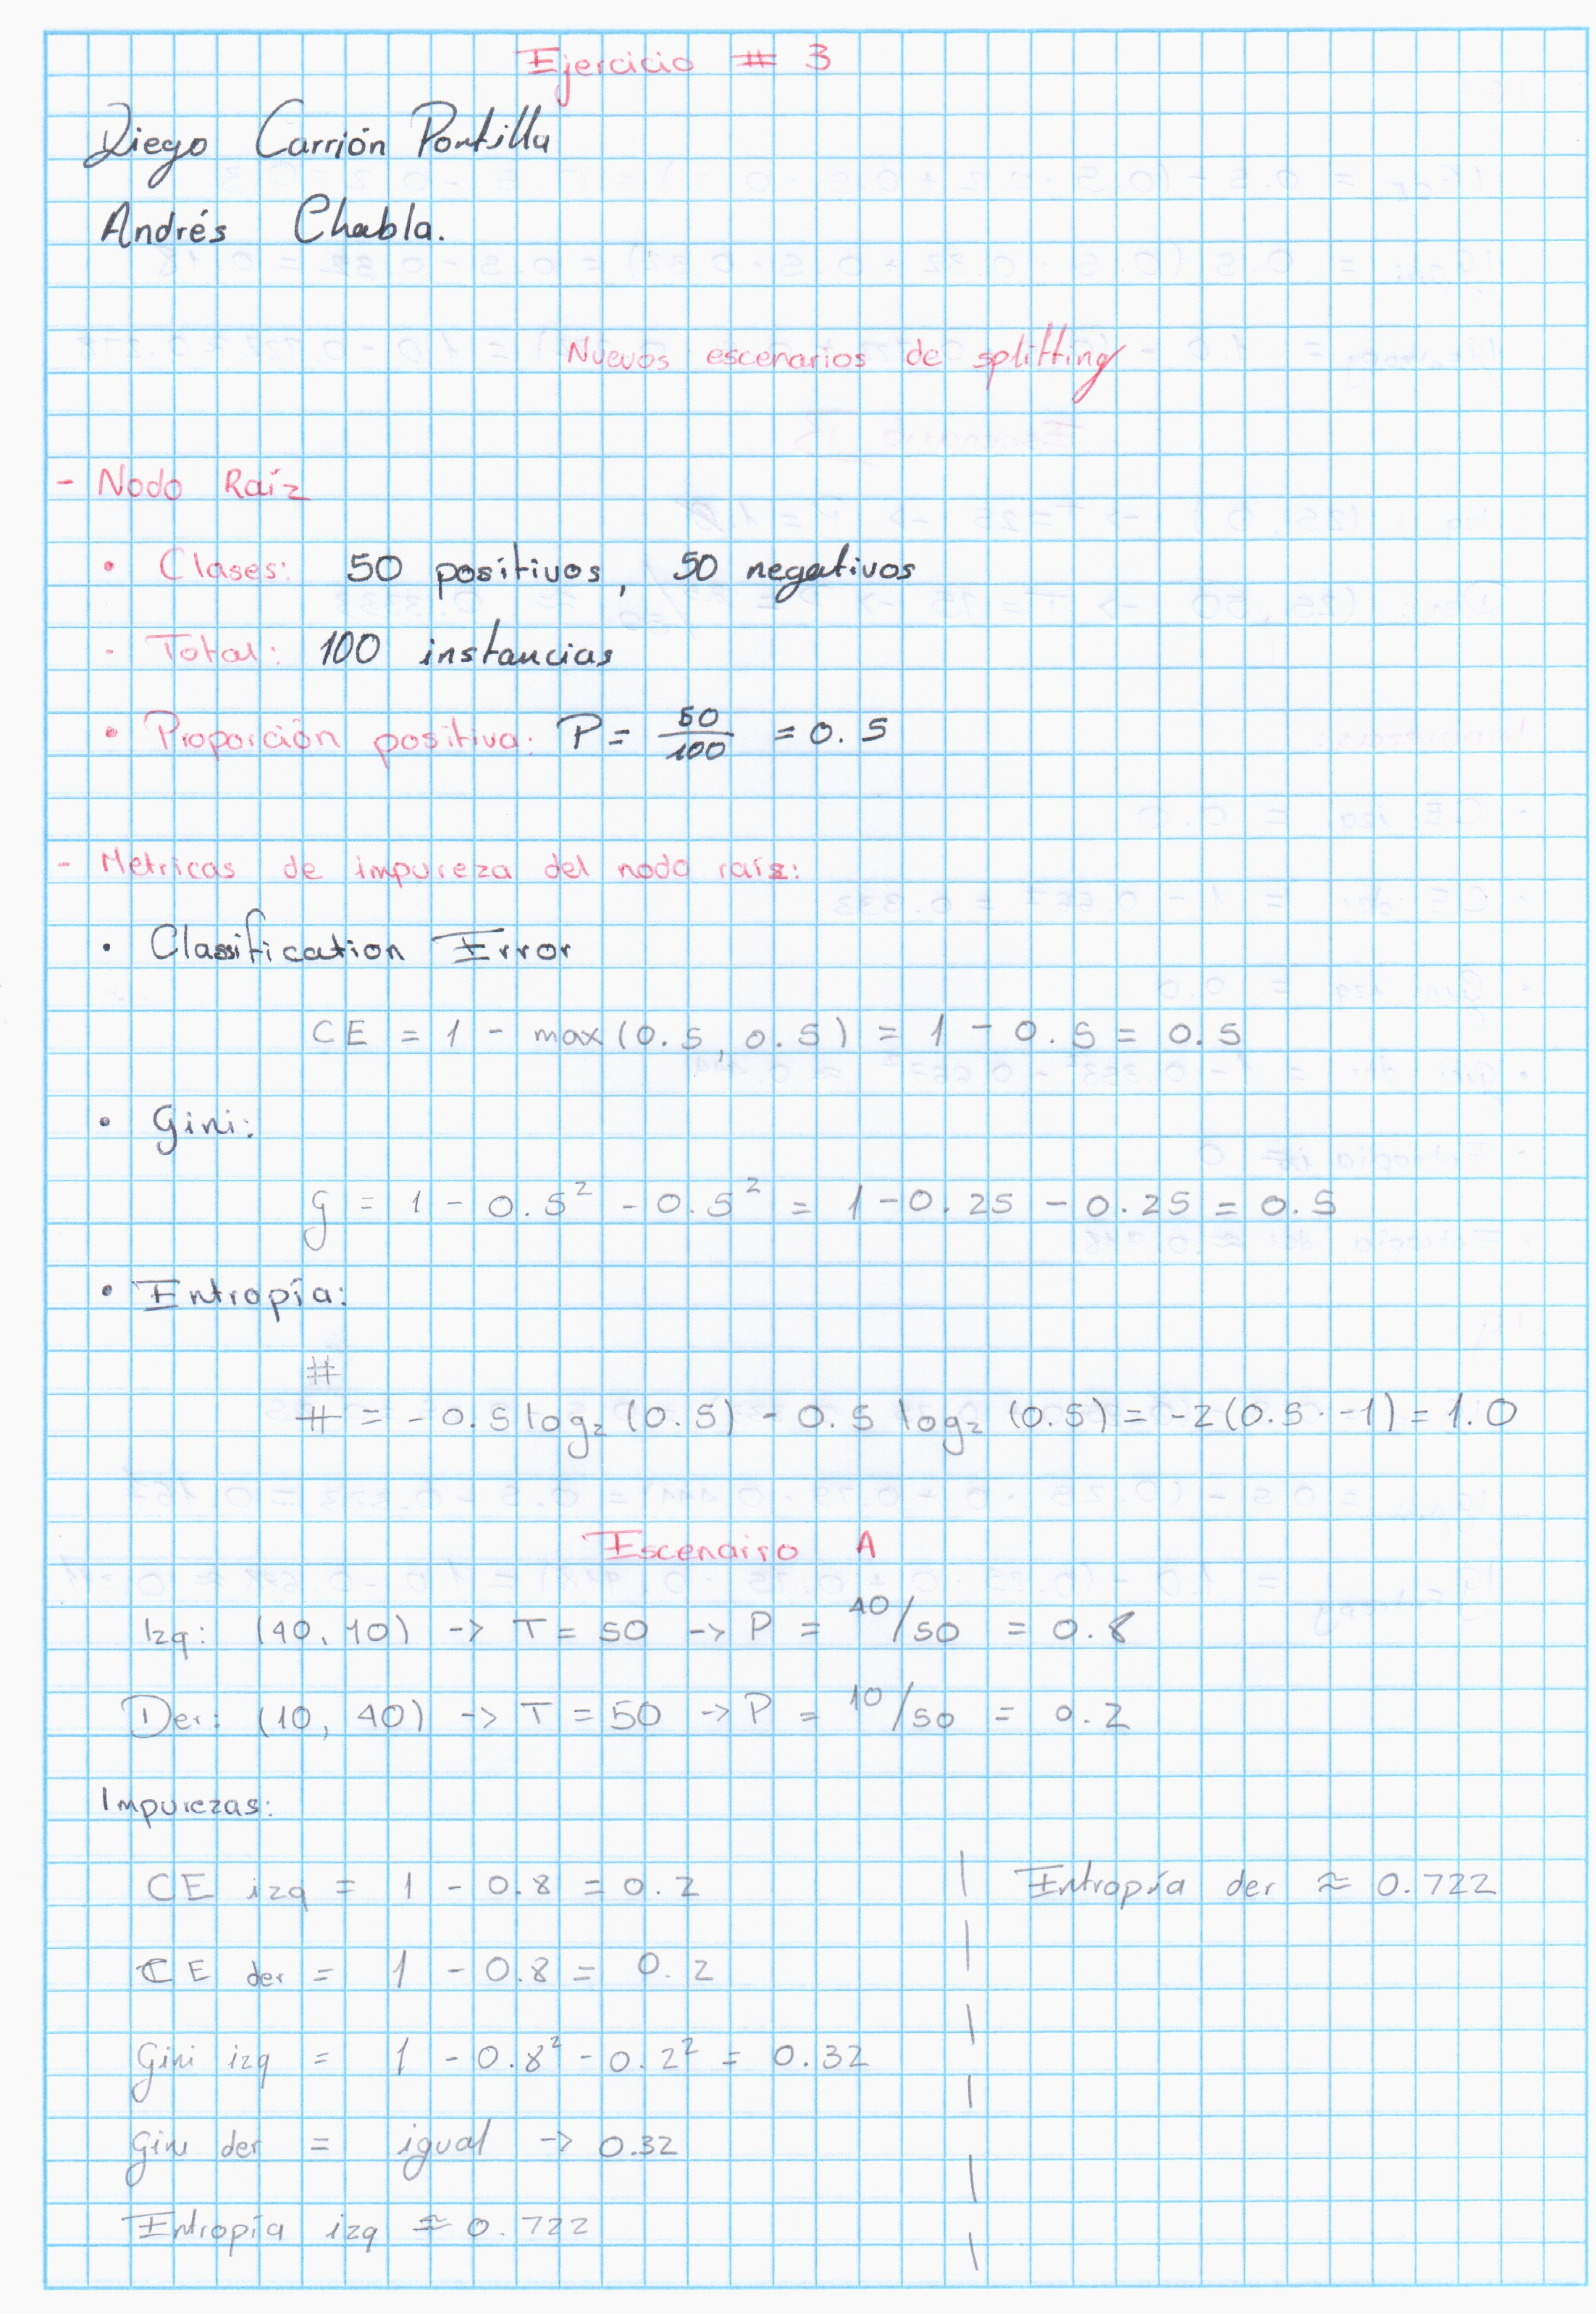

![Image (3).jpg](<attachment:Image (3).jpg>)
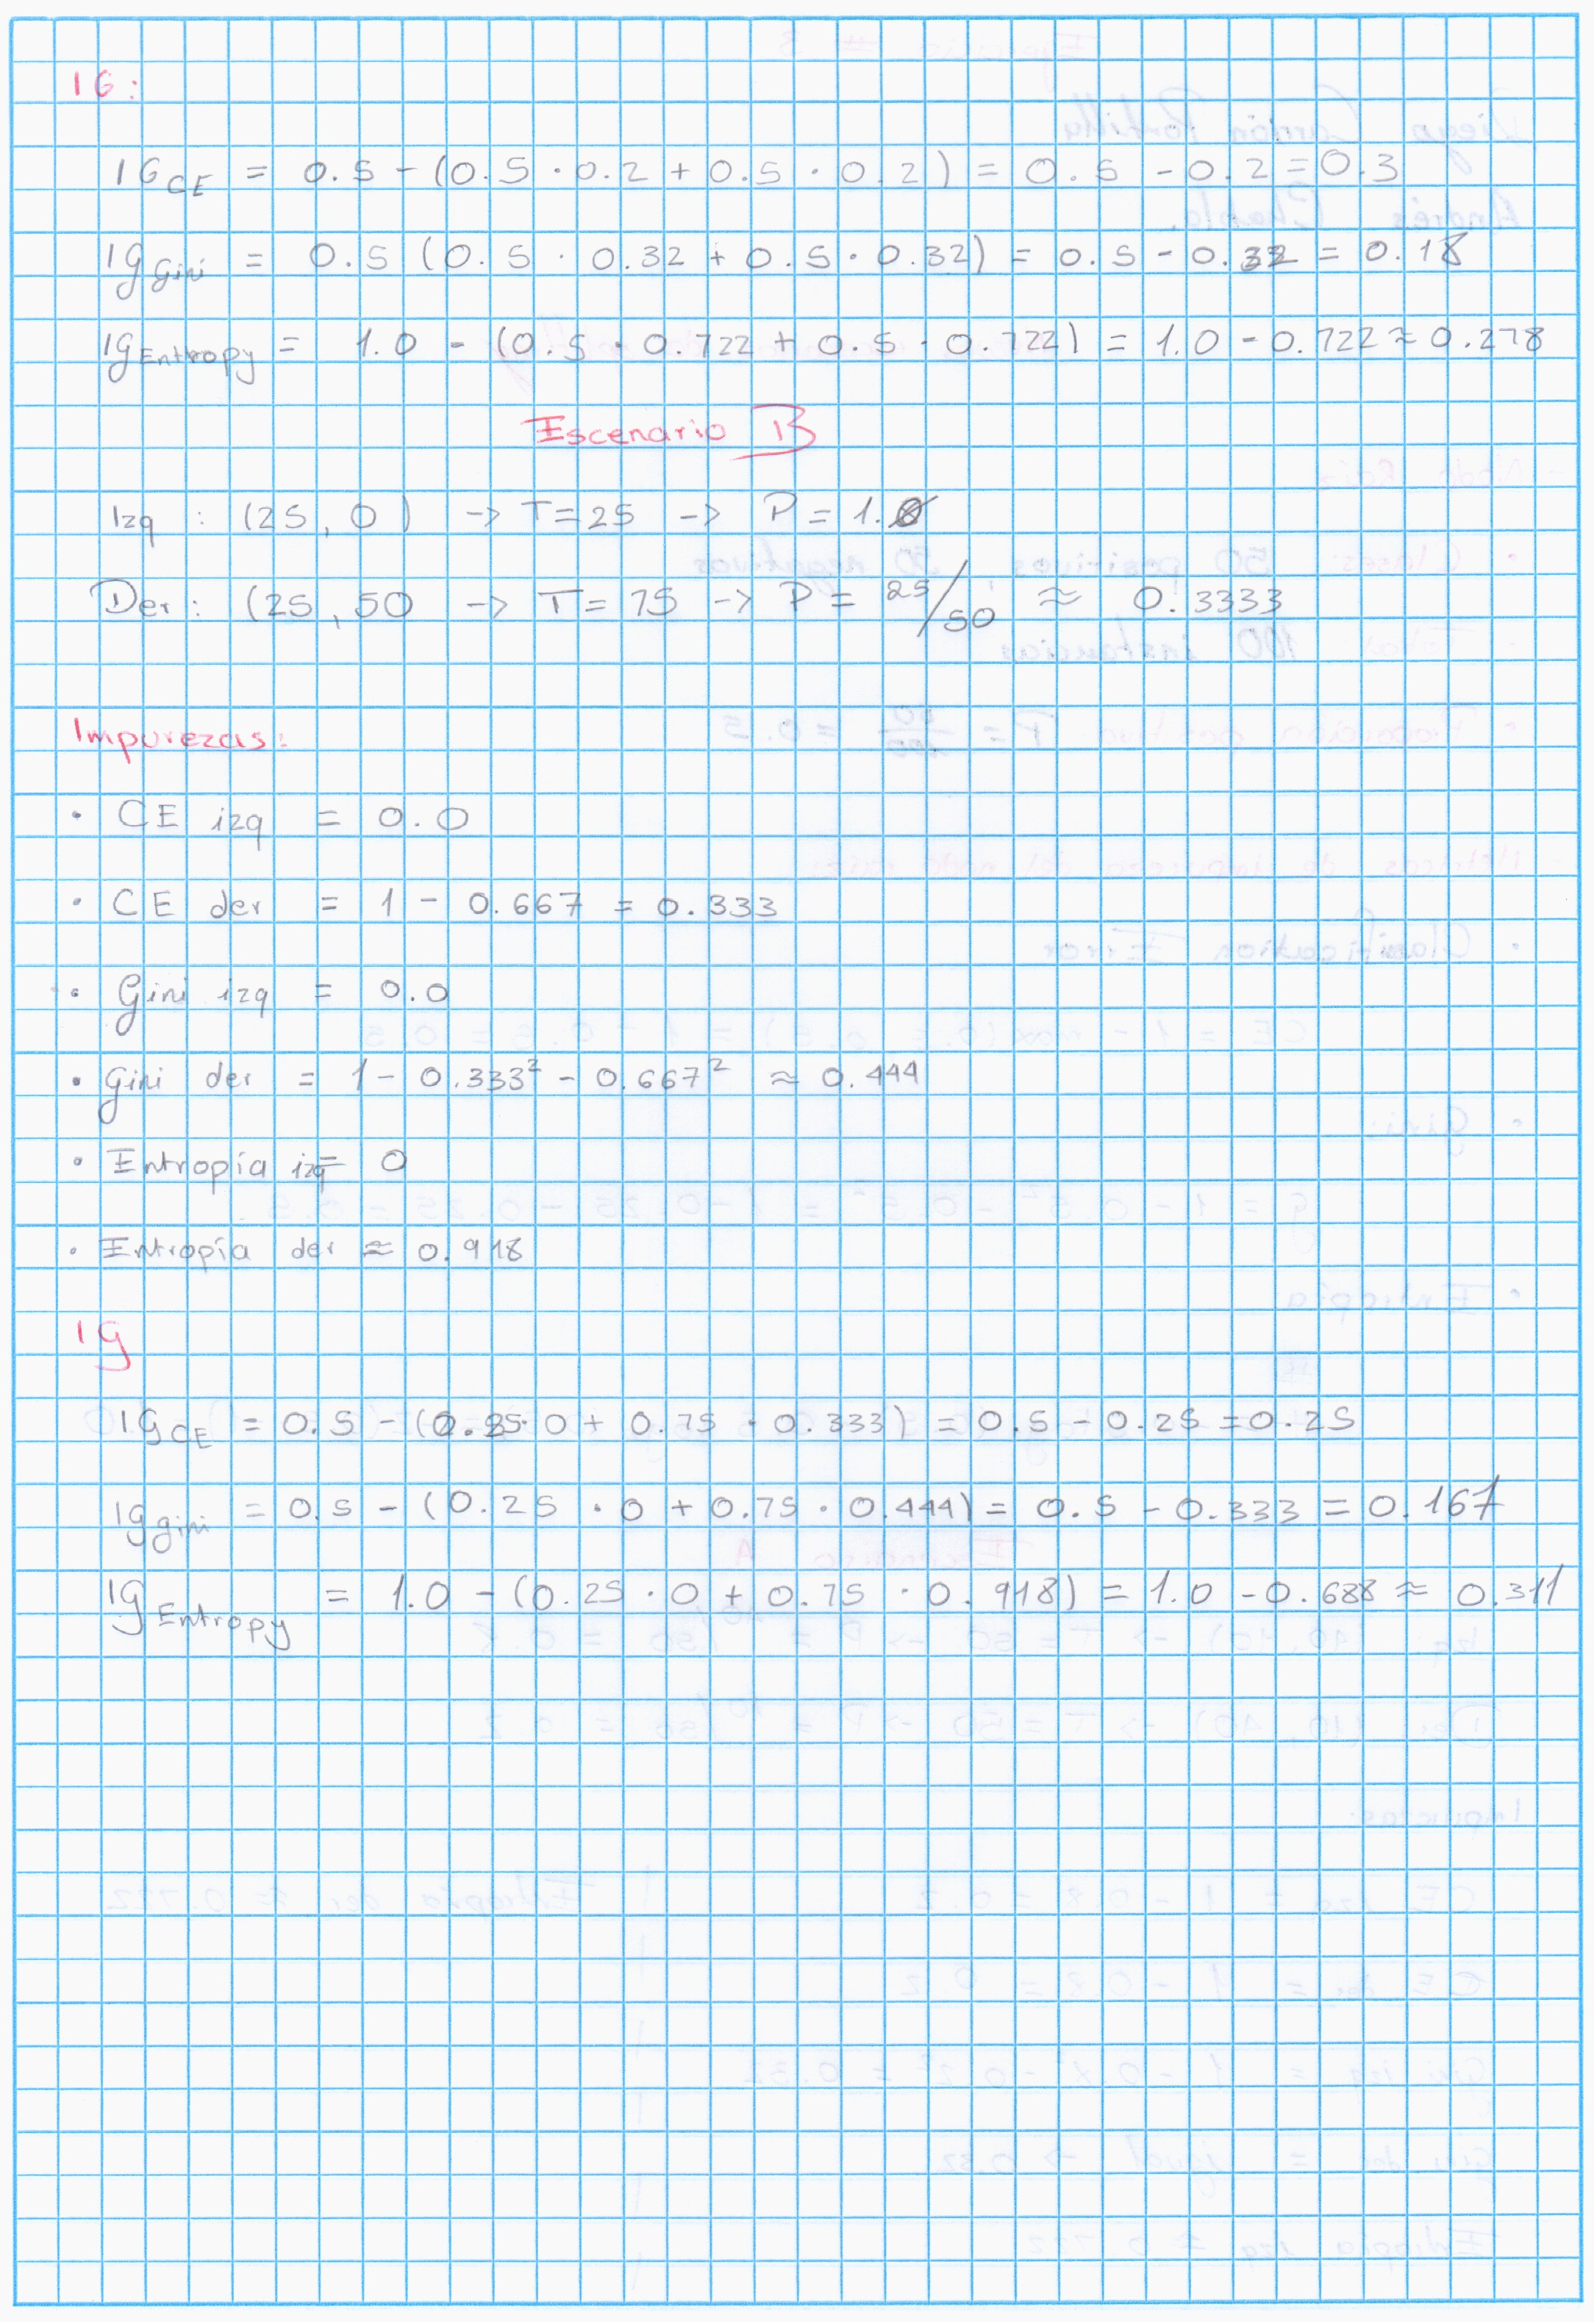